<a href="https://colab.research.google.com/github/JuanGoezD/IO-20241/blob/main/Taller_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Control de contaminación
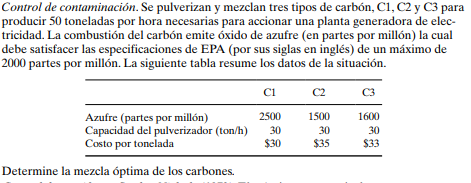

In [15]:
import cvxpy as cp

# Definir variables de decisión
x1 = cp.Variable(nonneg = True)
x2 = cp.Variable(nonneg = True)
x3 = cp.Variable(nonneg = True)

# Definir la función objetivo
z = 30*x1 + 35*x2 + 33*x3
objective = cp.Minimize(z)

# Definir restricciones
constraints = [
    2500*x1 + 1500*x2 + 1600*x3 <= 2000*(x1 + x2 + x3),
    x1 <= 30,
    x2 <= 30,
    x3 <= 30,
    x1 + x2 + x3 == 50
]

# Definir el problema de optimización
problem = cp.Problem(objective, constraints)

# Resolver el problema
problem.solve()

# Imprimir resultados
print("Valor óptimo de x1 (toneladas de carbón 1):", round(x1.value, 2))
print("Valor óptimo de x2 (toneladas de carbón 2):", round(x2.value, 2))
print("Valor óptimo de x3 (toneladas de carbón 3):", round(x3.value, 2))
print("Valor óptimo de la función objetivo (z):", round(problem.value, 2))

Valor óptimo de x1 (toneladas de carbón 1): 22.22
Valor óptimo de x2 (toneladas de carbón 2): 0.0
Valor óptimo de x3 (toneladas de carbón 3): 27.78
Valor óptimo de la función objetivo (z): 1583.33


# Publicidad
The Reggio Advertising Company desea planificar una campaña publicitaria en tres medios diferentes: televisión, radio y revistas. El propósito del programa publicitario es alcanzar a tantos clientes potenciales como sea posible. A continuación se presentan los resultados de un estudio de mercado.



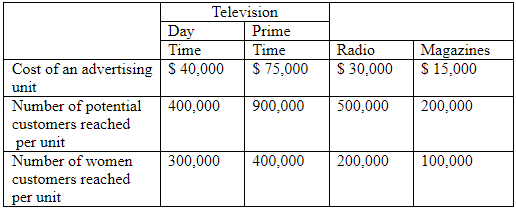

La compañía no quiere gastar más de 800,000 en publicidad. Además, requiere que (1) haya al menos 2 millones de exposicione entre mujeres; (2) la publicidad en televisión esté limitada a 500,000; (3) se compren al menos 3 unidades de publicidad en televisión durante el día y dos unidades durante el prime time; y (4) el número de unidades de publicidad en radio y revistas debe estar entre 5 y 10 cada uno. Formule en un problema de programación lineal.

In [9]:
# Importar las librerías requeridas
import cvxpy as cp

# Definir las variables de decisión
x1 = cp.Variable(integer=True) # Television dia
x2 = cp.Variable(integer=True) # Television hora pico
x3 = cp.Variable(integer=True) # Radio
x4 = cp.Variable(integer=True) # Revistas

# Definir la función objetivo
objective = cp.Maximize(400*x1 + 900*x2 + 500*x3 + 200*x4)

# Definir las restricciones
constraints = [
    # Número de clientes mujeres alcanzadas por la campaña
    300 *x1 + 400*x2 + 200*x3 + 100*x4 >= 2000,
    # Límite de presupuesto
    40*x1 + 75*x2 + 30*x3 + 15*x4 <= 800,
    # Límite de publicidad en televisión
    40*x1 + 75*x2 <= 500,
    # Al menos 3 unidades de publicidad en televisión durante el día
    x1 >= 3,
    # Al menos 2 unidades de publicidad en televisión durante el prime time
    x2 >= 2,
    # Entre 5 y 10 unidades de publicidad en radio
    x3 >= 5,
    x3 <= 10,
    # Entre 5 y 10 unidades de publicidad en revistas
    x4 >= 5,
    x4 <= 10
]

# Definir el problema de optimización
problem = cp.Problem(objective, constraints)

# Resolver el problema
problem.solve()

# Imprimir resultados
print("Valor óptimo de Televisión día:", x1.value)
print("Valor óptimo de Televisión hora pico:", x2.value)
print("Valor óptimo de Radio:", x3.value)
print("Valor óptimo de Revistas:", x4.value)
print("Valor óptimo de la función objetivo, en miles:", problem.value)


Valor óptimo de Televisión día: 3.0
Valor óptimo de Televisión hora pico: 3.0
Valor óptimo de Radio: 10.0
Valor óptimo de Revistas: 10.0
Valor óptimo de la función objetivo: 10900.0


# Hawaii Sugar Company
Hawaii Sugar Company produce azúcar morena, azúcar procesada (blanca), azúcar glas,
y melazas a partir del jarabe de caña de azúcar. La compañía compra 4000 toneladas de
jarabe semanalmente y la contratan para que suministre cada semana un mínimo de 25
toneladas de cada tipo de azúcar. El proceso de producción se inicia con la fabricación de
azúcar morena y melaza a partir del jarabe. Una tonelada de jarabe produce .3 toneladas
de azúcar morena y .1 tonelada de melaza. El azúcar blanca resulta de procesar el azúcar
morena. Se requiere una tonelada de azúcar morena para producir .8 toneladas de azúcar
blanca. El azúcar glas se produce a partir del azúcar blanca mediante un proceso de molienda especial cuya eficiencia de conversión es de 95% (una tonelada de azúcar blanca
produce .95 toneladas de azúcar glas). Las utilidades por tonelada de azúcar morena,
azúcar blanca y melaza son $150$, $200$, $230$ y $35$, respectivamente. Formule el problema
como un programa lineal, y determine el programa de producción semanal utilizando
AMPL, Solver o TORA.


In [5]:
# Importar las librerías requeridas
import cvxpy as cvx

# Crear las variables de decisión
x_j  = cvx.Variable(nonneg = True)
x_1v = cvx.Variable(nonneg = True)
x_1p = cvx.Variable(nonneg = True)
x_4  = cvx.Variable(nonneg = True)
x_2v = cvx.Variable(nonneg = True)
x_2p = cvx.Variable(nonneg = True)
x_3  = cvx.Variable(nonneg = True)

# Definir la función objetivo
obj_00 = cvx.Maximize(150 * x_1v + 200 * x_2v + 230 * x_3 + 35 * x_4)

# Establecer las restricciones

constraints_00 = [
    x_1v + x_1p - 0.3 * x_j == 0,

    x_4 - 0.1 * x_j == 0,

    x_2v + x_2p - 0.8 * x_1p == 0,

    x_3 - 0.95 * x_2p == 0,

    x_4 <= 4000,

    x_1v >= 25,
    x_2v >= 25,
    x_3 >= 25,
    x_4 >= 25
]

# Configurar el problema
problema_00 = cvx.Problem(obj_00, constraints_00)

# Obtener el valor óptimo
problema_00.solve()

# Mostrar el estado de la solución
print("Estado de la solución:", problema_00.status)

# Mostrar el valor óptimo de la función objetivo
print(f"Valor óptimo de la función objetivo:{problema_00.value:.2f}")

# Mostrar los valores óptimos de las variables de decisión
print(f"Valor óptimo del járabe: {x_j.value:.2f}")
print(f"Valor óptimo del azúcar morena para la venta: {x_1v.value:.2f}")
print(f"Valor óptimo del azúcar morena para la producción: {x_1p.value:.2f}")
print(f"Valor óptimo de la melaza: {x_4.value:.2f}")
print(f"Valor óptimo del azúcar blanca para la venta: {x_2v.value:.2f}")
print(f"Valor óptimo del azúcar blanca para la producción: {x_2p.value:.2f}")
print(f"Valor óptimo del azúcar glass: {x_3.value:.2f}")

Estado de la solución: optimal
Valor óptimo de la función objetivo:2236517.50
Valor óptimo del járabe: 40000.00
Valor óptimo del azúcar morena para la venta: 25.00
Valor óptimo del azúcar morena para la producción: 11975.00
Valor óptimo de la melaza: 4000.00
Valor óptimo del azúcar blanca para la venta: 25.00
Valor óptimo del azúcar blanca para la producción: 9555.00
Valor óptimo del azúcar glass: 9077.25
